# Linked Data con Python

Usaremos:

* gastrodon: Toolkit to display, analyze, and visualize data and documents based on RDF graphs and the SPARQL query language using Pandas, Jupyter, and other Python ecosystem tools. https://github.com/paulhoule/gastrodon
* sys
* pandas 

<div class="alert alert-warning" role="alert" style="margin: 10px">
Para instalar la librería:<br>
jovyan@9778f76bfaea:~$ /opt/conda/bin/pip install gastrodon
</div>

## Cargamos el entorno

In [1]:
import sys
from gastrodon import RemoteEndpoint,QName,ttl,URIRef,inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from IPython.display import display, HTML
pd.options.display.width=120
pd.options.display.max_colwidth=100

Definimos los prefijos que de los "namespace" a utilizar

In [2]:
prefixes=inline("""
    @prefix : <http://dbpedia.org/resource/> .
    @prefix dbo: <http://dbpedia.org/ontology/> .
    @prefix dbp: <http://dbpedia.org/property/> .
    @prefix foaf: <http://xmlns.com/foaf/0.1/> .
""").graph

Y el endpoint sobre el que vamos a hacer las consultas. En este caso, dbpedia.

In [3]:
endpoint=RemoteEndpoint(
    "http://dbpedia.org/sparql/"
    ,default_graph="http://dbpedia.org"
    ,prefixes=prefixes
    ,base_uri="http://dbpedia.org/resource/"
)

## Tripletas en DBpedia

Con una consulta simple, podemos contar el número de tripletas

In [4]:
count=endpoint.select("""
    SELECT (COUNT(*) AS ?count) { ?s ?p ?o .}
""").at[0,"count"]
count

1152979851

## Número de predicados

Para la siguiente consulta, hacemos una lista de predicados comunes. El número de respuestas en el endpoint de DBPEDIA está limitado a 10000.

Each predicate is a relationship between a topic and either another topic or a literal value.  For instance,  the **rdf:type** predicate links a topic to another topic representing a class that the first topic is an instance,  for instance:

```
<Alan_Alda> rdf:type on:Person .
```

**rdfs:label**,  on the other hand,  links topics to literal values,  such as

```
<Alan_Alda> rdfs:label 
                "Alan Alda"@en,
                "アラン・アルダ"@ja . 
```

Strings in RDF (like the one above) are unusual compared to other computer languages because they can contain language tags,  a particularly helpful feature for multilingual databases such as DBpedia.

In [5]:
predicates=endpoint.select("""
    SELECT ?p (COUNT(*) AS ?count) { ?s ?p ?o .} GROUP BY ?p ORDER BY DESC(?count)
""")
predicates

,count
p,
dbo:wikiPageWikiLink,256993447
rdf:type,147249428
owl:sameAs,64502206
rdfs:label,60973800
rdfs:comment,46901765
...,...
dcterms:source,1
dcterms:title,1
dcterms:creator,1


Podemos enseñar solo los N primeros resultados

In [6]:
predicates.head(30)

,count
p,
dbo:wikiPageWikiLink,256993447
rdf:type,147249428
owl:sameAs,64502206
rdfs:label,60973800
rdfs:comment,46901765
dcterms:subject,35679744
dbo:wikiPageID,20799964
dbo:wikiPageRevisionID,20799963
dc:language,16903774


O los últimos

In [7]:
predicates.tail()

,count
p,
dcterms:source,1
dcterms:title,1
dcterms:creator,1
dbp:wikilink,1
http://dbpedia.org/property/usnwrg(partTimeMba)_,1


## Visualización de resultados

**dbo:Image** Algunos resultados de dbpedia son links a imagenes, que gracias a Jupyter, podemos visualizarlos

In [8]:
endpoint.select("""
    SELECT (COUNT(*) AS ?count) { SELECT DISTINCT ?type { ?s a ?type .} }
""")

,count
0,483639


In [9]:
types=endpoint.select("""
    SELECT ?type (COUNT(*) AS ?count) { ?s a ?type .} GROUP BY ?type ORDER BY DESC(?count)
""")
types[types.index.str.startswith('dbo:')]

,count
type,
dbo:Image,12079364
dbo:CareerStation,2708561
dbo:Person,2293328
dbo:TimePeriod,2242487
dbo:Eukaryote,1988553
...,...
dbo:BaseballSeason,272
dbo:Rower,265
dbo:AmericanLeader,264


In [24]:
pics = endpoint.select("""
    SELECT ?that { 
        ?that a dbo:Image
    } LIMIT 10
""")
pics

,that
0,"http://commons.wikimedia.org/wiki/Special:FilePath/\nBlauwe_irissen,_RP-P-1999-419.jpg"
1,"http://commons.wikimedia.org/wiki/Special:FilePath/\nBlauwe_irissen,_RP-P-1999-419.jpg?width=300"
2,http://commons.wikimedia.org/wiki/Special:FilePath/\nC-Fletcher.jpg
3,http://commons.wikimedia.org/wiki/Special:FilePath/\nC-Fletcher.jpg?width=300
4,"http://commons.wikimedia.org/wiki/Special:FilePath/\nChalk-browed_Mockingbird,_northern_Argentin..."
5,"http://commons.wikimedia.org/wiki/Special:FilePath/\nChalk-browed_Mockingbird,_northern_Argentin..."
6,http://commons.wikimedia.org/wiki/Special:FilePath/\nCuculus_canorus_MHNT.ZOO.2010.11.150.34.jpg
7,http://commons.wikimedia.org/wiki/Special:FilePath/\nCuculus_canorus_MHNT.ZOO.2010.11.150.34.jpg...
8,http://commons.wikimedia.org/wiki/Special:FilePath/\nCyril_Livingstone_Rainbow_Plaque.jpg
9,http://commons.wikimedia.org/wiki/Special:FilePath/\nCyril_Livingstone_Rainbow_Plaque.jpg?width=300


In [25]:
HTML('<img src="{0}">'.format(pics.at[9,'that']))

## Ejercicio 1

Muestra la imagen de un escritor/a vivo

In [26]:
escritores = endpoint.select("""
SELECT ?nombre ?foto
WHERE{
    ?autor a dbo:Writer .
    ?autor foaf:name ?nombre .
    ?autor dbo:birthDate ?fechaNac .
    ?autor foaf:depiction ?foto
    FILTER NOT EXISTS { ?autor dbo:deathDate ?death. }
} 
LIMIT 100



""")
escritores

,nombre,foto
0,Cai Lujun,"http://commons.wikimedia.org/wiki/Special:FilePath/Cai_Lujun,_Taipei,_Taiwan.jpg"
1,Caitlín R. Kiernan,http://commons.wikimedia.org/wiki/Special:FilePath/C_R_Kiernan.jpeg
2,Caitlín R. Kiernan,http://commons.wikimedia.org/wiki/Special:FilePath/Caitlín_R._Kiernan_by_Kyle_Cassidy2.jpg
3,Caitlín R. Kiernan,"http://commons.wikimedia.org/wiki/Special:FilePath/Kiernan_in_2018,_Providence,_RI.jpg"
4,Calvert Watkins,http://commons.wikimedia.org/wiki/Special:FilePath/Calvert_Watkins.jpg
...,...,...
95,Prabhat Ranjan,http://commons.wikimedia.org/wiki/Special:FilePath/PrabhatRanjan.jpg
96,Prachi Garg,http://commons.wikimedia.org/wiki/Special:FilePath/Prachi_Garg_Indian_Author.jpg
97,Praful Raval,http://commons.wikimedia.org/wiki/Special:FilePath/Praful_Raval_autograph1.svg
98,Praful Raval,http://commons.wikimedia.org/wiki/Special:FilePath/Shri_Praful_Raval.jpg


In [28]:
HTML('<img src="{0}"><img src="{0}">'.format(escritores.at[1,'foto']))


In [21]:
escritores.at[2,'foto']

rdflib.term.URIRef('http://commons.wikimedia.org/wiki/Special:FilePath/Caitlín_R._Kiernan_by_Kyle_Cassidy2.jpg')

Los datos se pueden recoger en distintos tipos de estructuras para mostrarlos en gráficos. Veamos un ejemplo de un diagrama de barras.

In [14]:
places = endpoint.select("""
SELECT ?city ?population
WHERE{
    ?city a dbo:PopulatedPlace .
    ?city dbo:populationTotal ?population
    FILTER (?population > 1000000)
} 
ORDER BY ASC(?population)
LIMIT 100
""")

In [15]:
places.head(10)

,city,population
0,<Oshodi-Isolo>,1000509
1,<Fizi_Territory>,1000674
2,<Latifabad_Tehsil>,1000761
3,<Muğla>,1000773
4,<Muğla_Province>,1000773
5,<Lakhisarai_district>,1000912
6,<Quetta>,1001205
7,<Haripur_District>,1001515
8,<Granma_Province>,1001678
9,"<Kota,_Rajasthan>",1001694


0           <Oshodi-Isolo>
1         <Fizi_Territory>
2       <Latifabad_Tehsil>
3                  <Muğla>
4         <Muğla_Province>
5    <Lakhisarai_district>
6                 <Quetta>
7       <Haripur_District>
8        <Granma_Province>
9        <Kota,_Rajasthan>
Name: city, dtype: object

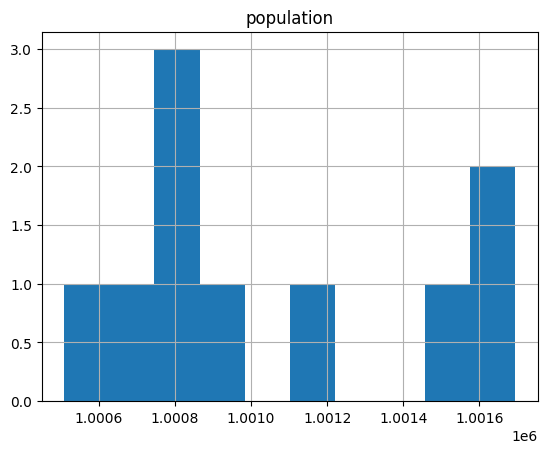

In [16]:
places.head(10).hist()
places.head(10)['city']

# Ejercicios de consultas

<div class="alert alert-warning" role="alert" style="margin: 10px">
La librería a veces tiene problemas con las fechas. Si es así, colocal la consulta en el endpoint directamente para comprobar que si el problema está en la consulta o en el paquete.
</div>

1. Comunidad autónoma a la que pertenece cada ciudad

In [36]:
ciudadEsp = endpoint.select("""
SELECT  ?city ?region
WHERE {
    ?city a dbo:City.
    ?region dbp:settlementType dbr:Autonomous_communities_of_Spain.
    ?city dbo:subdivision ?region.
    ?city dbo:populationTotal ?population .
    FILTER (?population > 10000) .
    
}
LIMIT 10
""")
ciudadEsp

,city,region
0,<Valladolid>,<Castile_and_León>
1,<Salamanca>,<Castile_and_León>
2,<Aranda_de_Duero>,<Castile_and_León>
3,<Burgos>,<Castile_and_León>
4,<Puertollano>,<Castilla–La_Mancha>
5,<Ponferrada>,<Castile_and_León>
6,<Santa_María_de_Benquerencia>,<Castilla–La_Mancha>
7,<Bellas_Vistas>,<Community_of_Madrid>
8,<Santiago_de_Compostela>,<Galicia_(Spain)>
9,<El_Viso_(Madrid)>,<Community_of_Madrid>


2. Obtener el tamaño de las ciudades más extensas de España


In [13]:
biggest_cities = endpoint.select("""
SELECT ?city ?areaKm
WHERE {
    ?city a dbo:City .
    ?city dbo:country <Spain> .
    ?city dbp:areaTotalKm ?areaKm . 
    ?city dbo:populationTotal ?population .
    FILTER (?population > 10000 && ?areaKm > 100) .
   

}
LIMIT 10
""")
biggest_cities

,city,areaKm
0,<Castellón_de_la_Plana>,108
1,<Puertollano>,226
2,<Santiago_de_Compostela>,220
3,<Huesca>,161
4,<Valladolid>,197
5,<Elche>,326
6,<Gijón>,181
7,<Murcia>,881
8,<Aranda_de_Duero>,127
9,"<Linares,_Jaén>",197


3. Diferencia de altura mínima entre la ciudad más alta y más baja (con una altitud entre 100 y 789 msnm)

In [12]:
alturaDif = endpoint.select("""
SELECT (MAX(?altitud) - MIN(?altitud) AS ?difAltitud)
WHERE {
    ?city a dbo:City.
    ?region dbp:settlementType dbr:Autonomous_communities_of_Spain.
    ?city dbo:subdivision ?region.
    ?city dbo:elevation ?altitud.
    ?city dbo:populationTotal ?population .
    FILTER (?population > 10000 && ?altitud > 100 && ?altitud < 789) .    
   
}
""")
alturaDif

,difAltitud
0,579


4. Poblaciones de la CCAA de Cantabria 

In [42]:
locCantabria = endpoint.select("""
SELECT ?city
WHERE {
    ?city dbo:subdivision <Cantabria> .
}
LIMIT 10
""")
locCantabria

,city
0,<Cabezón_de_Liébana>
1,<Cabezón_de_la_Sal>
2,<Cabuérniga>
3,<Camaleño>
4,"<Camargo,_Spain>"
5,<Campoo>
6,<Campoo_de_Enmedio>
7,<Campoo_de_Yuso>
8,<Cartes>
9,"<Castañeda,_Spain>"


5. Obtener la población total de Londres 

In [54]:
pobLond = endpoint.select("""
SELECT ?poblacionLondres ?city
WHERE {
    ?city a dbo:City .
    <United_Kingdom> dbo:capital ?city .
    ?city dbo:populationTotal ?poblacionLondres .
}

""")
pobLond

,poblacionLondres,city
0,8799800,<London>


6. Gente que nació en Londres antes de 1915 

In [14]:
before1915 = endpoint.select("""
SELECT ?name (str(?birthDate) AS ?birthDate)
WHERE {
    ?city a dbo:City .
    <United_Kingdom> dbo:capital ?city .

    ?person a foaf:Person .
    ?person foaf:name ?name .
    
    ?person dbo:birthPlace ?city.

    ?person dbo:birthDate ?birthDate.
    FILTER (YEAR(?birthDate) < 1915)
}
LIMIT 10
""")
before1915

,name,birthDate
0,Calvert Vaux,1824-12-20
1,Campbell Singer,1909-03-16
2,Carlo Krahmer,1914-03-11
3,Carlos Raúl Villanueva,1900-05-30
4,Carlos González de Candamo y Rivero,1871-02-15
5,Carmen Dillon,1908-10-25
6,Carol Reed,1906-12-30
7,Caroline Agnes Gray,1848-05-13
8,"Caroline, Lady Stansfeld",1816-01-28
9,The Baroness Holland,1723-03-27


7. Nombre y fechas de nacimiento y de muerte de toda la gente nacida en Londres entre 1920 y 1970. 

In [8]:
from20to70 = endpoint.select("""
SELECT ?name (str(?birthDate) AS ?birthDate) (str(?deathDate) AS ?deathDate)
WHERE {
    ?city a dbo:City .
    <United_Kingdom> dbo:capital ?city .

    ?person a foaf:Person .
    ?person foaf:name ?name .
    
    ?person dbo:birthPlace ?city.

    ?person dbo:birthDate ?birthDate.
    ?person dbo:deathDate ?deathDate.
    FILTER (YEAR(?birthDate) >= 1920 && YEAR(?birthDate) <= 1970).
}
LIMIT 10
""")
from20to70

,name,birthDate,deathDate
0,Carlo Little,1938-12-17,2005-08-06
1,Carmel Budiardjo,1925-06-18,2021-07-10
2,Carmen Blacker,1924-07-13,2009-07-13
3,Carol Marsh,1926-05-10,2010-03-06
4,Carol Raye,1923-01-17,2022-06-18
5,Carol White,1943-04-01,1991-09-16
6,Carole Shelley,1939-08-16,2018-08-31
7,Caroline Aherne,1963-12-24,2016-07-02
8,Caron Keating,1962-10-05,2004-04-13
9,Caspar Bowden,1961-08-19,2015-07-09


8. Nombre y fecha de nacimiento de los actores nacidos en Londres después de 1943 que siguen vivos.

In [22]:
actor = endpoint.select("""
SELECT ?name (str(?birthDate) AS ?birthDate) 
WHERE {
    ?city a dbo:City .
    <United_Kingdom> dbo:capital ?city .

    ?person a dbo:Actor.
    ?person foaf:name ?name .
    
    ?person dbo:birthPlace ?city.

    ?person dbo:birthDate ?birthDate.
    
    FILTER (YEAR(?birthDate) >= 1943).
    FILTER NOT EXISTS { ?person dbo:deathDate ?death. }
}
LIMIT 10
""")
actor

,name,birthDate
0,Rosalind Mabel C. Halstead,1984-07-18
1,Samantha Bentley,1987-10-08
2,Sarah Thomas,1952-06-05
3,Bessie Carter,1993-10-25
4,Billy Barratt,2007-06-16
5,Jonathan Coy,1953-04-24
6,Paul Griffiths,1957-10-16
7,Rhys Stephenson,1993-10-29
8,Mary Woodvine,1967-07-14
9,Matthew Marsh,1954-07-08


9. Fotos de 10 de los actores nacidos en Londres después de 1943 que siguen vivos.

In [29]:
actorFoto = endpoint.select("""
SELECT ?name ?foto 
WHERE {
    ?city a dbo:City .
    <United_Kingdom> dbo:capital ?city .

    ?person a dbo:Actor.
    ?person foaf:name ?name .
    
    ?person dbo:birthPlace ?city.

    ?person dbo:birthDate ?birthDate.

    ?person foaf:depiction ?foto
    
    FILTER (YEAR(?birthDate) >= 1943).
    FILTER NOT EXISTS { ?person dbo:deathDate ?death. }
}
LIMIT 10
""")
actorFoto

,name,foto
0,Samantha Bentley,http://commons.wikimedia.org/wiki/Special:FilePath/Samantha_Bentley_2014.jpg
1,Paul Griffiths,http://commons.wikimedia.org/wiki/Special:FilePath/The_Future_of_Airport_Infrastructure_&_the_Pa...
2,Matthew Marsh,http://commons.wikimedia.org/wiki/Special:FilePath/Matthew_Marsh.jpg
3,Luisa Bradshaw-White,http://commons.wikimedia.org/wiki/Special:FilePath/Luisa_Bradshaw-White_2016.jpg
4,Karla-Simone Spence,http://commons.wikimedia.org/wiki/Special:FilePath/Karla_at_BlueStory_Premiere.jpg
5,Ana Mulvoy-Ten,http://commons.wikimedia.org/wiki/Special:FilePath/Ana_Mulvoy-Ten_in_2015.jpg
6,Eros Vlahos,http://commons.wikimedia.org/wiki/Special:FilePath/Eros_Vlahos_cropped.jpg
7,Eugene Simon,http://commons.wikimedia.org/wiki/Special:FilePath/eugene_simon_2020_1.jpg
8,Heshima Thompson,http://commons.wikimedia.org/wiki/Special:FilePath/HeshimaThompson.jpg
9,Kim Hartman,http://commons.wikimedia.org/wiki/Special:FilePath/Stockholmsmässan_2011_bild_14.jpg


In [42]:
#Ejemplo
HTML('<img src="{0}"><img src="{0}">'.format(actorFoto.at[4,'foto']))

10 . Diagrama de barras de las 10 peliculas más largas con un presupuesto mayor de 250M

In [25]:
peliculaLarga = endpoint.select("""
SELECT DISTINCT ?name (?time_/3600 as ?time)
WHERE {
    ?pelicula a dbo:Film .
    ?pelicula foaf:name ?name .
    ?movie dbp:budget ?budget .
    ?pelicula dbo:runtime ?time_.
    FILTER(?budget > 250000000)
}
ORDER BY DESC(?time)
LIMIT 10
""")
peliculaLarga

,name,time
0,Punk in Africa,303
1,Puppet Master,19
2,American Pie,13
3,Scream,9
4,Men in Black,6
5,The Mummy,6
6,Batang West Side,5
7,Queen at Wembley,5
8,Carry On Jatta series,4
9,The Before Trilogy,4


Text(0, 0.5, 'Duración (horas)')

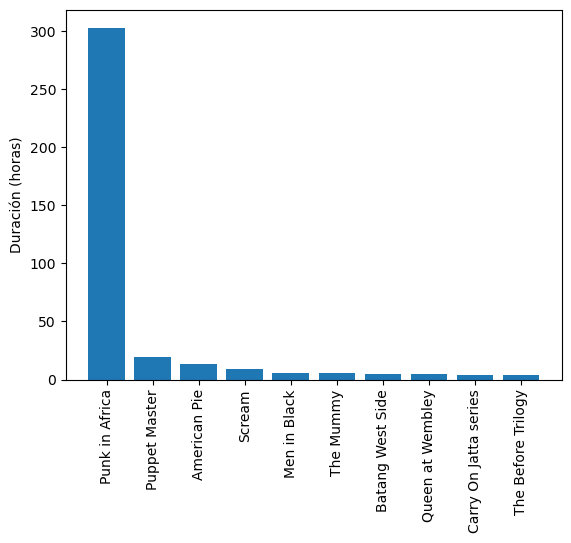

In [26]:
x=peliculaLarga['name']
y=peliculaLarga['time']
plt.bar(x, y)

plt.xticks(rotation=90)
plt.ylabel('Duración (horas)')